# Bài 11. Giải thuật lan truyền ngược

Trong các phần trước, chúng ta đã tìm hiểu các thuật toán cơ bản đến nâng cao của **Neural Network**(nói nâng cao thì hơi quá, nhưng mà nâng cao này được cải tiến từ cơ bản). Tiếp tục, chúng ta sẽ tìm hiểu phần còn lại, đó là mạng neural nhiều tầng và giải thuật lan truyền ngược.

Qua phần này(kèm theo các phần trước), chúng ta sẽ hiểu được
- Hoạt động thực sự của một mạng nerual nhiều tầng.
- Vấn đề xoay quanh hàm kích hoạt.
- Giải thuật lan truyền ngược giúp tăng tốc thuật toán.
- Hiểu được cái  thứ mà bạn nghĩ là mình sẽ không thể hiểu.


## Nội dung
1. Đặt vấn đề
2. Mạng neural nhiều tầng
3. Vấn đề về hàm kích hoạt
4. Lan truyền ngược
5. Demo Python
6. Đánh giá MLP và Backpropagation
7. Kết luận

----

## 1. Đặt vấn đề

Dữ liệu của các thuật toán PLA, Logistic Regression, Softmax Regression là tách biệt nhau một cách rạch rồi(linearly seperable) hoặc gần như vậy. Vậy đối với bộ dữ liệu mà không có tính chất linearly seperable thì PLA, Logistic Regression SR không áp dụng vào được.

![Non linearly seperable](https://scontent-hkg3-2.xx.fbcdn.net/v/t1.15752-9/72526872_2420766981364219_2092531916564594688_n.png?_nc_cat=111&_nc_oc=AQl9wS6fGRC1kBy6c8gZ6h7Yutp0aKfexNuPLbPGFwqQEDC8VRD6QnU-Um_VOhvEGK8&_nc_ht=scontent-hkg3-2.xx&oh=419d8e693bf781d986e29cc1010aee07&oe=5E201543)

**Làm sau để phân lớp dataset không tính chất linearly seperable?**

## 2. Mạng Neural nhiều tầng

### 2.1 Slove problem

Lấy một bài toán cụ thể của bài toán mà yêu cầu đặt ra là phân chia tập dữ liệu của chúng ta với tính chất là non-linearly seperable thành các class một cách chính xấc như hình dưới đây.

![](https://scontent.fhan5-5.fna.fbcdn.net/v/t1.15752-9/72408168_410686579849611_7077380847040462848_n.png?_nc_cat=101&_nc_oc=AQkVSF5gb_ifhPLdrx2kCSeuiM05SOSsaX-hUB9V-VYBgDD9QbSD18wFsAGl2XbyYVM&_nc_ht=scontent.fhan5-5.fna&oh=84516ee03896447ab8743b79349380eb&oe=5E2713D6)

Hình trên trên mô phỏng bài toán xem một người với chiều cao H và cân nặng W có thuộc nhóm người bình thường hay không, hình vuông đại diện cho người không bình thường, trái lại hình tam giác đại diện cho người bình thường. Bạn có thể tìm được một đường thẳng mà phân chia rạch ròi hai lớp người(lớp người bình thường và lớp người không bình thường) hay không ?

Câu trả lời là **không thể dùng một traight line mà phân hoạch rạch rồi 2 lớp dữ liệu này được** mà phải dùng nhiều hơn, tức là dùng 2 traight line để phân hoạch tập dữ liệu này như hình dưới đây.

![](https://scontent-hkg3-2.xx.fbcdn.net/v/t1.15752-9/72727537_250172749267595_3339821188468703232_n.png?_nc_cat=108&_nc_oc=AQmkmzJWhOdbejG1GgvBvCd2B1JykwuezcpBcUIXnbOyR_p11bVzVzwiniR2lVvv3Ss&_nc_ht=scontent-hkg3-2.xx&oh=c367ba5332a78638e42da91925c33b67&oe=5E23FC72)

Giả sử hai đường thẳng mà ta tìm được để phân hoạch tập dữ liệu là $d_1$ và $d_2$, cùng với đó là quy ước dấu của các điểm dữ liệu đối với $d_1$ và $d_2$ như hình vẽ. Nếu một điểm dữ liệu nào mà rơi vào vùng có dấu $-$ đối với $d_1$ và dấu $+$ đối với $d_2$ thì điểm dữ liệu đó được phân vào lớp người bình thường, ngược lại nếu một điểm dữ liệu rơi vào vùng không phải vùng lý tưởng đó thì nó được phân vào lớp người không bình thường. 

Đến đây ta đã tìm ra được hướng giải quyết bài toán mà tập dữ liệu ko thỏa tính chất linearly seperable. Vấn đề còn lại là làm sao hiểu nó được giải quyết như nào, tức là tìm hai đường thẳng $d_1$ và $d_2$.

### 2.2 Multiplayer neural network

Giả sử hai đường thẳng mà ta tìm được trong bài toán trên là:
- $d_1: x - y + 20 = 0$
- $d_2: 2x - y - 10 = 0$

![](https://scontent.fsgn5-1.fna.fbcdn.net/v/t1.15752-9/73168108_960563354280663_2904838883688579072_n.jpg?_nc_cat=101&_nc_oc=AQnTRDW6XgKQHG5SbIEAfoqe93LDIhsIM9fYDUct3vvqlnb3nN7Ok0conZQEpVxG0a4&_nc_ht=scontent.fsgn5-1.fna&oh=9db757707de6e8abf3882a1498407c9a&oe=5E20F0AB)

Bằng việc biễu diễn lại dưới dạng Neural network ta được như hình dưới đây:
![](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/72629684_409718349646053_8810240361013182464_n.jpg?_nc_cat=106&_nc_oc=AQl4JR9dULOamHwK8XUvExmjP43O2XvFZt6gemduiJsi9R-qgw0vvWOGdE8lVmMlg4c&_nc_ht=scontent.fsgn5-6.fna&oh=86f90097ef490ad1d6466bc9be262513&oe=5E63EAA8)

**Tại sao ta có thể biểu diễn được như vậy(từ một graph sang một neural network) ?**

Ta sử dụng 3 perceptron ở hình trên được xếp thành 2 layers(tầng). Layer thứ nhất: đầu vào-đỏ, đầu ra-xanh. Layer thứ hai, đầu vào màu xanh, đầu ra màu xanh. Ở đây đầu ra của layer thứ nhất chính là đầu vào của layer thứ hai. Tổng hợp lại ta được một mô hình mà ngoài layer đầu vào(đỏ) và đầu ra(xanh), ta còn một layer ở giữa.

**Một Neural network với nhiều hơn hai layer được gọi là Multilayer Neural Network**. Đôi khi còn được gọi là Deep feedforward network, feedforward neural network. **Từ Feedforward** được hiểu là dữ liệu đi thẳng từ đầu vào tới đầu ra theo các mũi tên mà không quay lại ở điểm nào, tức là network có dạng là một **cyclic graph(đồ thị không có chu trình kín)**. Trong ví du trên, ta xem xét hàm kích hoạt là hàm dấu $sgn$, nhưng thực tế ta thường dùng các hàm phi tuyến.

Cụ thể hơn, một multilayer neural network là một neural network có nhiều layer, làm nhiệm vụ xấp xỉ mỗi quan hệ giữa các quan hệ $(x, y)$ trong tập huấn luyên bằng một hàm số có dạng:
$$y \approx g^{(L)}(g^{(L-1)}(...(g^{(2)}g^{(1)}(x)))))$$
trong đó layer thứ nhất đống vai trò như hàm $g^{(1)}(x)$; layer thứ hai đóng vai trò như hàm $g^{(2)}(g^{(1)}))$

Chúng ta quan tâm đến các layer đóng vai trò như các hàm có dạng:
$$g^{(l)}(a(^{(l-1)})) = f^{(l)}(W^{(l)T})a^{(l-1)}+b^{(l)})$$

![](https://miro.medium.com/proxy/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

Đầu ra của một Multilayer neural network loại này tương ứng với một đầu vào x có thể được tính theo:
![](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/72329531_1370509869797446_4761704304044146688_n.png?_nc_cat=111&_nc_oc=AQk3hDoNalUKI0Yw91NUAwqqQRUiu1zXCaOfl8Qlml1wro5Qbwl_WKhgLNaumi-NZzw&_nc_ht=scontent.fsgn5-3.fna&oh=9d74ce5bd0eb596a1e6b68bd5d933922&oe=5E32101A)

Đây chính là đầu ra dự đoán. Bước này được gọi là feedforward vì cách tính toán được thực hiện từ đầu đến cuối của network. Hàm mất mát thỏa mãn đạt giá trị càng nhỏ khi đầu ra càng gần với đầu ra thực sự. Tùy vào bài toán, là classification hay là regression, chúng ta cần thiết kế các hàm mất mát thích hợp

### 2.3 Các kí hiệu và khái niệm liên quan

Như vậy ta đã biết được khái niệm Multilayer neural network, và nó được bắt nguồn từ bài toán phân lớp dữ liệu không có tính chất linearly seperable. Tiếp theo ta đi sâu vào các khái niệm trong Multilayer neural network.

**Layer**: 
- Ngoài *input layer* và *output layer*, một multilayer neural  network có thể có nhiều hidden layer ở giữa. Các hidden layer theo thứ tự từ input layer đến output layer được đánh số thứ tự là hidden layer 1, hidden layer 2,... Hình dưới đây là một ví dụ về multilayer neural network với 2 hidden layer.
![](https://scontent.fsgn5-4.fna.fbcdn.net/v/t1.15752-9/72362439_2142465482725057_3002025180324167680_n.png?_nc_cat=104&_nc_oc=AQmyT3RYr9q_gu7s3wHbxn6MjREf5ZPlw6hWZ7T-ABrHEnfJyW-5iFEe1D3sjIHyvps&_nc_ht=scontent.fsgn5-4.fna&oh=ca17ce99409e574f944cad0ea8fa0c0d&oe=5E1AB770)

- Số lượng layer trong một multilayer neural network, được kí hiệu là L, được tính bằng số hidden layer cộng với 1. Khi đến số layer của một multilayer neural network ta không tính input layer. Trong hình trên, $L = 3$.

**Units**:
![](https://www.researchgate.net/profile/Sajad_Jafari3/publication/275334508/figure/fig1/AS:294618722783233@1447253985297/Schematic-of-the-multilayer-feed-forward-neural-network-proposed-to-model-the-chaotic.png)
- Mỗi node hình tròn trong một layer được gọi là một unit.

**Weights and biases**:
- Có L ma trận trọng số cho một multilayer neural network có L layer.
- Các ma trận này được ký hiệu là $W^{l}\in R^{d(l-1)}\times d^{(l)}, l = 1,2,...,L$, trong đó $W^{(l)}$ thể hiện các kết nối từ layer thứ $l-1$ đến layer thứ $l$(nếu ta coi input layer là layer thứ 0).
- Cụ thể hơn nếu ta coi phần tử $w_{ij}^{(l)}$ thể hiện kết nối từ node thứ $i$ của layer thứ $(l-1)$ tới node thứ $j$ của layer thứ $l$.
- Các bias của của layer thứ $(l)$ được kí hiệu là $b^{(l)} \in R^{d(l)}$. 
- **Khi tối ưu một Multilayer neural network cho một công việc nào đó, chúng ta cần đi tìm các weight và bias này. Tập hợp các weight và bias này lần lượt kí hiệu là $W$ và $b$**.

## 3. Vấn đề về hàm kích hoạt

### 3.1 Hàm kích hoạt là một hàm phi tuyến

Mỗi output layer(trừ input layer) được tính dựa trên công thức:
### $$a^{(l)} = f^{(l)}(W^{(l)T})a^{(l-1)}+b^{(l)})$$
trong đó $f$ là một hàm kích hoạt phi tuyến. **Nếu hàm kích hoạt tại một layer là một hàm tuyến tính, layer này và layer tiếp theo có thể rút gọn thành một layer vì hợp của các hàm tuyến tính là một hàm tuyến tính** dẫn đến các layer không có ý nghĩa.


### 3.2 Hàm sgn không được dùng trong  MLP

Hàm sgn chỉ sử dụng trong perceptron. Trong thực tế, hàm sgn không được sử dụng và đạo hàm tại hầu hết các điểm bằng 0(trừ tại điểm 0 không có đạo hàm). Việc đạo hàm bằng 0 khiến các thuật toán dựa trên Gradient Descent không hoạt động.

### 3.3 Sigmoid và tanh

![Sigmoid and tanh function](http://ronny.rest/media/blog/2017/2017_08_16_tanh/tanh_v_sigmoid.jpg)

Hàm sigmoid có dạng $sigmoid(z) = 1/(1+exp(-z))$ với đồ thị như trên. Nếu giá trị đầu vào lớn, hàm số sẽ cho ra giá trị gần bằng 1, ngược lại càng nhỏ khi đầu vào có giá trị càng nhỏ. Hàm này trước đây được dùng nhiều vì có đạo hàm đẹp($\sigma^{'}(x) = \sigma(x)(1-\sigma(x))$ ) nhưng gần đây thì ít được dùng.

Hàm $tanh(z) = \frac{exp(z)-exp(-z)}{exp(z)+exp(-z)}$ mang lại hiệu quả tốt hơn hàm sigmoid với miền giá trị là $[-1,1]$ khiến cho nó có tính chất zero-centered, thay vì dương hoàn toàn như hàm sigmiod.

**Chú ý**: *Khi khởi tạo các hệ số cho Multilayer Neural Network với hàm kích hoạt là sigmoid, chúng ta phải tránh trường hợp đầu vào một hidden layer nào đó quá lớn, vì khi đó đầu ra của hidden layer đó sẽ rất gần với 0 hoặc 1, dẫn đến đạo hàm bằng 0 và GD không hoạt động được.*

### 3.4 Hàm ReLU

**ReLU (Rectified Linear Unit)** được sử dụng rộng rãi trong những năm gần đây vì tính đơn giản của nó. Đồ thị của hàm ReLU được thể hiện dưới đây, với công thức: $f(z) = max(0, z)$
![Sigmoid and ReLU function](https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png)

Đạo hàm của nó bằng 0 tại các điểm âm, bằng 1 tại các điểm dương. **ReLU được chứng minh giúp cho việc huấn luyện Multilayer Neural Network hay Deep network nhanh hơn nhiều so với hàm `tanh`**.

Mặc dù có nhược điểm là đạo hàm bằng 0 với các giá trị đầu vào âm nhưng ReLU được chứng minh bằng thực nghiệm rằng có thể khắc phục được việc này bằng cách tăng hidden layer unit. 

ReLU trở thành hàm kích hoạt đầu tiên chúng ta nên thử khi thiết kế một Multilayer neural network. Hầu hết các hidden layer đều dùng ReLU làm hàm kích hoạt trừ layer cuối cùng(output layer) có hàm kích hoạt phụ thuộc vào đầu ra yêu cầu của mỗi bài toán cụ thể.

Ngoài ra còn có các biến thể của hàm ReLU:
![Variant of ReLU function](http://www.programmersought.com/images/699/3ef07d67f4fb2e3085b92392e99cb69b.JPEG)

## 4. Lan truyền ngược(backpropagation)

Phương pháp phổ biến nhất để tối ưu Multilayer neural network chính là Gradient Descent(GD). Để áp dụng GD chúng ta cần tính được đạo hàm của hàm mất mất theo từng ma trận trọng số $W$ và vector bias $b^{(l)}$.

Giả sử $J(W, b, X, y)$ là một hàm mất mát của bài toán, trong đó $W, b$ là tập hợp tất cả các ma trận trọng số giữa các layer và vector bias của mỗi layer. $X, Y$ là cặp dữ liệu huấn luyện của mỗi cột tương ứng với mỗi điểm dữ liệu. Để có thể áp dụng được phương pháp GD, chúng ta cần tính được các $\nabla _{W}J; \nabla_{b^{(l)}}J, \forall l = 1, 2, ..., L.$

**Quá trình lan truyền thẳng(feedforward)**
![Feedforward NN](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/72329531_1370509869797446_4761704304044146688_n.png?_nc_cat=111&_nc_oc=AQk3hDoNalUKI0Yw91NUAwqqQRUiu1zXCaOfl8Qlml1wro5Qbwl_WKhgLNaumi-NZzw&_nc_ht=scontent.fsgn5-3.fna&oh=9d74ce5bd0eb596a1e6b68bd5d933922&oe=5E32101A)

**Phương pháp được dùng phổ biến nhất được dùng có tên là backpropagation giúp tính đạo hàm ngược từ layer cuối cùng đến layer đầu tiên**. Layer cuối cùng được tính toán trước vì nó gần gũi hơn với đầu ra dự đoán và hàm mất mát. Việc tính toán đạo hàm của các ma trận hệ số trong các layer trước được thực hiện dựa trên quy tắc chuỗi quen thuộc cho các đạo hàm của hàm hợp.

Stochastic Gradient Descent(SGD) có thể được dùng để tính gradient cho các ma trận trọng số và biases dựa trên một cặp điểm training $x,y$. Để cho đơn giản, ta coi $J$ là hàm mất mát nếu chỉ xét cặp điểm này, ở đây J là hàm bất kì. Đạo hàm của hàm mất mát theo chỉ một thành phần của ma trận trọng số của output layer:
![](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/72706305_2402679016512546_399828310994976768_n.png?_nc_cat=110&_nc_oc=AQmGwMdFVitJnNbHOypFHZMM8nmw6o8PUcOq6ehZuIuABp1KcdDhwjNz8bXC--4wXTY&_nc_ht=scontent.fsgn5-3.fna&oh=cfb6f9a524f0911322087aa555e79668&oe=5E2B8D7C)
Tương tự, đạo hàm của hàm mất mát theo bias của layer cuối cùng là:
![](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/72490258_456230731764300_5298085679966715904_n.png?_nc_cat=111&_nc_oc=AQlz3rCib0Nt52hhlMPvhXNRfQ118jmfCJkU31nr5OtEQ00VLvTwgXKsYBCj9B40aag&_nc_ht=scontent.fsgn5-3.fna&oh=4cb4a843aaef582270e8bfefbb3344c6&oe=5E192AAB)
Dựa vào quy tắc chuỗi, ta tính được:
![](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/73313844_569929310414085_8079592163979034624_n.png?_nc_cat=106&_nc_oc=AQmslqeAzb0_F0MoZvDx-xBZaGbP5xp5HYR_KK-4gdr5lRzBhqw5rafQRhsPiw5N_-g&_nc_ht=scontent.fsgn5-6.fna&oh=30bf810e00a7363f573700b68139d779&oe=5E1A07A8)
với
![](https://scontent.fsgn5-5.fna.fbcdn.net/v/t1.15752-9/72703589_2406002362989320_4240453973351333888_n.png?_nc_cat=100&_nc_oc=AQmxP8SyrZfVxa5o_OYiqadOQ3M80U9mxIiO6fwWvkdjUfPc1hOTWNOWHXYXXyv4-2k&_nc_ht=scontent.fsgn5-5.fna&oh=85ab95ec64338b55ace705649ca45f8f&oe=5E5F668E)

Dấu $\Sigma$ tính tổng ở dòng thứ hai trong phép tính trên xuất hiện vì $a_j$ đóng góp vào việc tính tất cả các $z_k^{(l+1)}, k =1,2,...,d^{(l+1)}$. Biểu thức đạo hàm ngoài dấu ngoặc lớn là vì $a_j^{l} = f^{(l)}$. Tới đây, ta có thể hiểu tại sao hàm kích hoạt có đạo hàm càng đơn giản thì sẽ càng có ích trong việc tính toán. Tương tự ta suy ra được:
![](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/72623640_418376238881097_7398802558656970752_n.png?_nc_cat=109&_nc_oc=AQnjl_yGUT_Dsy2U1IyJp5ZpTyqakEdR2BKKIrIefv_MPgz1r9rI5huNLgRyZaVNWg8&_nc_ht=scontent.fsgn5-6.fna&oh=984129fc24ac7ac7998cb2ef3b595e82&oe=5E63B0E1)

Nhận thấy rằng trong công thức trên đây, việc tính các $e_j^{(l)}$ đóng vai trò quan trọng. Hơn nữa, để tính giá trị này, ta cần tính được các $e_j^{(l+1)}$. Nói cách khác, ta cần tính ngược các giá trị này từ cuối. Cái tên backpropagation cũng xuất phát từ việc này.

### 4.1 Đạo hàm theo từng hệ số $w_{ij}^{(l)}, b^{(l)}$

![](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/74418697_498518641066665_8632410478527643648_n.png?_nc_cat=109&_nc_oc=AQn94B5WAfu1KKv42xf4pWPzf4uFq2ul-qkUiS5Zy_YjwAwL9th7Gr09jSqN4tHbGI8&_nc_ht=scontent.fsgn5-6.fna&oh=84b23f0507474a9fc7f75805d241f7ee&oe=5E1B9289)

### 4.2 Đạo hàm theo ma trận $W^{(l)}, b^{(l)}$ 

![](https://scontent.fsgn5-1.fna.fbcdn.net/v/t1.15752-9/73423400_1317921828389005_4997175044233756672_n.png?_nc_cat=101&_nc_oc=AQko8tNyLZynxoRmaDRWr9oTlsEocEfY0XJVLgn4YmrHh2GOtcn_5YZFZvd0CGhc0qw&_nc_ht=scontent.fsgn5-1.fna&oh=20a8c4624ecc0ef6154e2ce3dece2f6f&oe=5E62A69C)

### 4.3 Backpropagation cho batch(mini-batch) gradient descent

**Nếu chúng ta muốn thực hiện batch hoạt mini-batch GD thì thế nào ?**

Trong thực tế, mini-batch GD được sử dụng nhiều nhất với các bài toán mà tập huấn luyện lớn. Nếu lượng dữ liệu là nhỏ, batch GD được dùng trực tiếp. Khi đó cặp (input, output) sẽ ở dạng ma trận $(X, y)$. Giả sử mỗi lần tính toán ta lấy N điểm dữ liệu để tính toán. Khi đó, $X \in \mathbb R^{d^{(0)}\times N}, Y \in \mathbb R^{d^{(l)} \times N} $.

Khi đó các activation sau mỗi layer sẽ có dạng $A^{(l)} \in \mathbb R^{d^{(l)}\times N}$. Tương tự, $E^{(l)} \in \mathbb R^{d^{(l)}\times N}$. Và ta có công thức cập nhật như sau:

![](https://scontent.fsgn5-5.fna.fbcdn.net/v/t1.15752-9/72397611_2329046057410259_971742483933298688_n.png?_nc_cat=108&_nc_oc=AQk4lHb0lJNzyyAHih8mSXs286vNyihnUoRgM9JEICr_9JW8uxw3KQiYjMkPszlMWt4&_nc_ht=scontent.fsgn5-5.fna&oh=92875468697c6359fcc36f4f45fc83c9&oe=5E1EA403)

## 5. Demo trên Python

Trong mục này, chúng ta sẽ tạo dữ liệu giả trong không gian hai chiều sao cho đường ranh giới giữa các class không có dạng tuyến tính. Điều này khiến cho softmax regression không làm việc được. Tuy nhiên bằng cách thêm vào một hidden layer, chúng ta sẽ thấy rằng neural network này làm việc rất hiệu quả.

### 5.1 Tạo dữ liệu giả

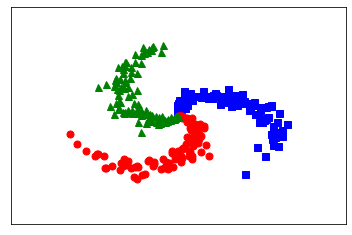

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*2,(j+1)*2,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

### 5.2 Các hàm phụ trợ

In [1]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

### 5.3 Chương trình chính

In [5]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098641
iter 1000, loss: 0.063618
iter 2000, loss: 0.048592
iter 3000, loss: 0.041016
iter 4000, loss: 0.035822
iter 5000, loss: 0.032483
iter 6000, loss: 0.030301
iter 7000, loss: 0.028784
iter 8000, loss: 0.027603
iter 9000, loss: 0.026590


### 4. Testing

In [6]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.00 %


## 6. Đánh giá MLP và Backpropagation

### 5.1 [MLP xấp xĩ hầu hết các hàm liên tục](https://www.dartmouth.edu/~gvc/Cybenko_MCSS.pdf)

Người ta đã chứng minh được rằng, với một hàm số liên tục bất kỳ $f(x)$ và một số $\varepsilon >0$, luôn luôn tồn tại một Neural Network với predicted output có dạng $g(x)$ với một hidden layer (với số hidden units đủ lớn và nonlinear activation function phù hợp) sao cho với mọi $x, |f(x) -g(x)| < \varepsilon$. Nói một cách khác, Neural Network có khả năng xấp xỉ hầu hết các hàm liên tục.

### 5.2 Khó khăn trong việc chọn số hidden units, hàm kích hoạt, Overfitting

Trên thực tế, việc tìm ra số lượng hidden units và nonlinear activation function nói trên nhiều khi bất khả thi. Thay vào đó, thực nghiệm chứng minh rằng Neural Networks với nhiều hidden layers kết hợp với các nonlinear activation function (đơn giản như ReLU) có khả năng xấp xỉ (khả năng biểu diễn) training data tốt hơn.

Khi số lượng hidden layers lớn lên, số lượng hệ số cần tối ưu cũng lớn lên và mô hình sẽ trở nên phức tạp. Sự phức tạp này ảnh hưởng tới hai khia cạnh. Thứ nhất, tốc độ tính toán sẽ bị chậm đi rất nhiều. Thứ hai, nếu mô hình quá phức tạp, nó có thể biểu diễn rất tốt training data, nhưng lại không biểu diễn tốt test data. Hay còn gọi hiện tượng này là **Overfitting.**

### 5.3 Các mạng cải thiện

Nếu mọi units của một layer được kết nối với mọi unit của layer tiếp theo (như chúng ta đang xét trong baì này), ta gọi đó là fully connected layer (kết nối hoàn toàn). Neural Networks với toàn fully connected layer ít được sử dụng trong thực tế. Thay vào đó, có nhiều phương pháp giúp làm giảm độ phức tạp của mô hình bằng cách giảm số lượng kết nối bằng cách cho nhiều kết nối bằng 0 (ví dụ, [sparse autoencoder](https://web.stanford.edu/class/cs294a/sparseAutoencoder_2011new.pdf)), hoặc các hệ số được ràng buộc giống nhau (để giảm số hệ số cần tối ưu) (ví dụ, [Convolutional Neural Networks (CNNs / ConvNets)](https://cs231n.github.io/convolutional-networks/)).

Tham khảo thêm tại [đây](http://deeplearning.net/)

## 7. Kết luận

Kết thúc phần này chúng ta biết cách khắc phục nhược điểm của các thuật toán Perceptron, Logistic Regression, Softmax Regression bằng cách sử dụng một mạng Neural Network nhiều tầng thay vì chỉ một tầng như ở các thuật toán trên. Một Neural Network có thể phân lớp tốt tập dữ liệu thành các lớp mà tập dữ liệu không có tính chất linearly seperable.

Bản chất của Multilayer Neural Network vẫn là một hàm số, hàm số được kết hợp từ rất nhiều hàm số lại với nhau, được học dựa trên quá trình lan truyền ngược(Backpropagation).

Kết thúc ANN tại đây, trong phần sau chúng ta sẽ tìm hiểu về một thuật toán khác trong bài toán phân lớp. Đó là Support Vector Machine(SVM) và có những đánh giá giữa SVM và ANN.